# YOLOv8 Custom dataset training (Hard Hat and Head dataset)

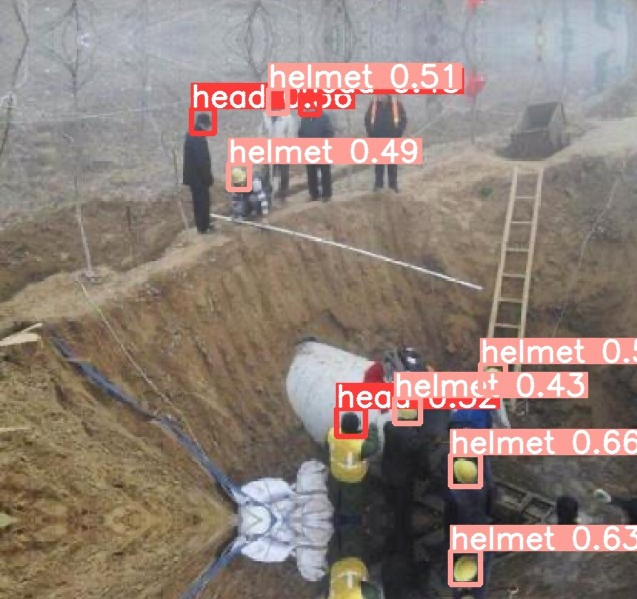

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

# ***Install YOLOv8***

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

***Inference with Pre-trained COCO Model***

---



In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [ ]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Download the dataset

The Dataset originally is taken from Kaggle which was in xml format then converted it to YOLOv8 format.

***Download dataset***:
[Download Link](https://drive.google.com/file/d/1hfsomOeqwY9AzFGaczj3ArHF4EX_w_hc/view?usp=sharing)

After downloading upload it your google drive or upload directly to google colab.

***Mount Google drive for Dataset***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***Unrar dataset***

In [ ]:
!unrar x -Y "/content/drive/MyDrive/dataset.rar" "/content/"

## Custom Training


I am using small model(yolov8s.pt)

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=25 imgsz=800 plots=True

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/datasets/data.yaml

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.5 source=path_to_your_test_images_folder save=True

# ***Results***

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")